In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os

/Users/hsu022210/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***

<div class="alert alert-block alert-danger">
## *Alec Hsu*

***

# Homework Assignment \#3

*due Thursday, March 6th, 2018 at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homework_03.ipynb``` file as a template and write the answers in text and include relevant code below each question. Print this document, double-sided, staple it, and hand it in on Thursday, March 6th, 2018, at 12.45pm at the beinning of class.  

### Question 1

*Preamble to Question #1*

In [10]:
faithfulData = sm.datasets.get_rdataset("faithful")
df_faithfulData = pd.DataFrame(faithfulData.data)

The faithful data set consists of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA. Regress waiting on eruptions and evalute the model in totality, i.e., evaluate the quality of the model, citing specific metrics, as well as validating necessary assumptions for the normal error regression model. Discuss, in detail, your approach and your evaluation of the model. Include all appropriate graphs and, if hypothesis tests are run, be certain to include all test details (null and alternative hypotheses, decision rules, p
-values and conclusions).

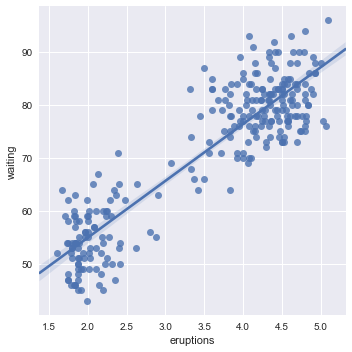

In [11]:
faithfulPlot = sns.lmplot('eruptions', 'waiting', data = df_faithfulData)

As we can see from the plot, the data is actually roughly linear, though they seems to cluster on two sides.

In [14]:
faithfulOLS = sm.OLS.from_formula('waiting ~ eruptions', df_faithfulData)
faithfulModel = faithfulOLS.fit()
faithfulModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                waiting   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          8.13e-100
Time:                        17:53:46   Log-Likelihood:                -868.38
No. Observations:                 272   AIC:                             1741.
Df Residuals:                     270   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4744      1.155     28.985      0.000      31.201      35.748
eruptions     10.7296      0.315     34.089      0.000      10.110      11.349
==============================================================================
Omnibus:                        5.492   Durbin-Watson:                   2.543
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.683
Skew:                           0.237   Prob(JB):                       0.0962
Kurtosis:                       2.567   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

In [20]:
faithfulModel.pvalues

Intercept     7.136015e-85
eruptions    8.129959e-100
dtype: float64

For hypothesis test: 
    
   $H_0: \beta_1 = 0$
    
   $H_1: \beta_1 \neq 0$

With p-value at around 0.000 which is smaller than 0.05, we can conclude that we reject the null hyphothesis.

### Question 2

In 1987, Phillip Ein-Dor and Jacob Feldmesser estimated the relative performance (ERP, #10 in data dictionary) of CPUs in an academic journal paper using linear regression. Import `erpData.csv`, using `header = None` as there is no header in the file. The data dictionary follows:

1. Vendor Name
2. Model Name
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

    (a) Create a correlation matrix or scatterplot matrix of variables 3-10. Identify three explanatory variables you believe would be good predictors of ERP.
    
    (b) Run three simple linear regression models: $X_1 \sim Y$, $X_2 \sim Y$, and $X_3 \sim Y$. Discuss the merits of each model with supporting evidence, and choose the model which you feel is the most appropriate in predicting ERP.

In [2]:
df_erpData = pd.read_csv('erpData.csv', header=None, names = ['Vendorname', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])
df_erpData.loc[:, 'MYCT':'ERP'].corr()
# df_erpData.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


As we can see from the correlation matrix, for ERP the three variables that has highest correlations are PRP, MMAX, and MMIN, which means the strength of their relationship with ERP is relativily strong compare to others.

In [11]:
erpOLS = sm.OLS.from_formula('ERP ~ PRP', df_erpData)
erpModel = erpOLS.fit()
erpModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     2933.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          3.43e-124
Time:                        18:15:07   Log-Likelihood:                -1065.7
No. Observations:                 209   AIC:                             2135.
Df Residuals:                     207   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1045      3.299      0.335      0.738      -5.399       7.608
PRP            0.9300      0.017     54.153      0.000       0.896       0.964
==============================================================================
Omnibus:                       56.581   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.868
Skew:                          -0.458   Prob(JB):                    1.19e-197
Kurtosis:                      13.164   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
erpOLS = sm.OLS.from_formula('ERP ~ MMAX', df_erpData)
erpModel = erpOLS.fit()
erpModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     895.0
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           4.21e-77
Time:                        18:15:31   Log-Likelihood:                -1175.1
No. Observations:                 209   AIC:                             2354.
Df Residuals:                     207   BIC:                             2361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.9650      6.604     -6.203      0.000     -53.986     -27.944
MMAX           0.0119      0.000     29.917      0.000       0.011       0.013
==============================================================================
Omnibus:                      156.706   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3061.543
Skew:                           2.577   Prob(JB):                         0.00
Kurtosis:                      21.028   Cond. No.                     2.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
erpOLS = sm.OLS.from_formula('ERP ~ MMIN', df_erpData)
erpModel = erpOLS.fit()
erpModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ERP   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     422.6
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           6.70e-52
Time:                        18:16:00   Log-Likelihood:                -1233.6
No. Observations:                 209   AIC:                             2471.
Df Residuals:                     207   BIC:                             2478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5795      7.658      0.729      0.467      -9.519      20.678
MMIN           0.0327      0.002     20.558      0.000       0.030       0.036
==============================================================================
Omnibus:                      237.682   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9921.384
Skew:                           4.579   Prob(JB):                         0.00
Kurtosis:                      35.488   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 3

An OLS simple linear regression is run and the resulting model is

$$\ln(\hat{y}) = 12.63 - 3.3\ln(x)$$

$$\hat{y} = \begin{equation} e^{12.63 - 3.3\ln(x)} \end{equation}$$

$$\hat{y} = \begin{equation} e^{12.63} x^{-3.3} \end{equation}$$

Interpret the coefficient $b_1$, showing all math where appropriate.

An increase in x by 1% will result in a decrease of $\hat{y}$ by 3.3% on average.

### Question 4

An OLS multiple linear regression is run and the resulting model is

$$\hat{y} = -22.51 - 59x_1 + 445x_2 - x_3$$

Interpret the coefficients $b_1$, $b_2$ and $b_3$.

$b_1$: An increase in x1 by 1 unit will result in decrease in the estimated $\hat{y}$ variable by 59  on average, when x2 and x3 are held constant.
 
$b_2$: An increase in x2 by 1 unit will result in increase in the estimated $\hat{y}$ variable by 445  on average, when x1 and x3 are held constant.
 
$b_3$: An increase in x3 by 1 unit will result in increase in the estimated $\hat{y}$ variable by 1  on average, when x1 and x2 are held constant.

### Question 5

Refer to the ERP data in Question 2. Generate a correlation matrix. Based solely on the correlation matrix and *without* running a MLR model, which three predictors would you select to include in an initial model. Support your decision with evidence.

In [29]:
df_erpData.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


We want three variables that have higher correlation with ERP, but not highly correlated with each others, so I'll go with PRP, MMAX, and MMIN, though I am a little wondering if the relationship betweem PRP and MMIN are a bit highly correlated.

### Question 6

Using both math and words, explain the tradeoffs involved in the calculation of the Adjusted Coefficient of Multiple Determination ($R_a^2$), and how it differs from the Coefficient of Multiple Determination ($R^2$).

$R^2 = SSR/SSTO = 1 - SSE/SSTO$

$R^2_a = 1 - (SSE/n-p)/(SSTO/n-1) = 1 - (n-1/n-p)(SSE/SSTO)$

We cannot unexplain errors, that being said, by adding more variables to the model, the $R^2$ value just going to be larger, never become smaller. However, $R^2_a$ has been adjusted for the number of predictors in the model. It increases only if the new variable improves the model more than would be expected, It decreases when a predictor improves the model by less than expected. So usually we test it out the model result, to see when the model has a smallest gap between $R^2$ and $R^2_a$.

### Question 7

Explain why we need to be cautious of extrapolations in MLR.

Since it is MLR, we should not predicting the response to an input which lies outside of the range of the values of the predictor variable used to fit the model, because the real regress funtion might not be the same line that we predict within the range of the values of the predictor variable used.

### Question 8

Discuss the differences between Type 1 and Type 2 ANOVA Tables. 

Type 1: Variables are sequentially added to the regression model.

Type 2: For each variable, we get a test for adding one of the predictors to a model that includes all other variables.

### Question 9

Refer to the Figure on slide 333. Discuss the sequential nature of model building, using the Body Fat Example on the slide (data on course website if you would like to explore, but not necessary).

When regressing $\hat{y}$ on only $X_1$, the model is able to explain an SSR=352.27 of SSTO=495.39, 

when regressing $\hat{y}$ on only $X_2$, the model is able to explain an SSR=381.97 of SSTO=495.39,

when regressing $\hat{y}$ on only $X_1$ and $X_2$, the model is able to explain an SSR=385.44 of SSTO=495.39.

The model is able to explain 3.47 more by taking $X1$ into consideration under the circumstances that $X_2$ is in the model.

The model is able to explain 33.17 more by taking $X2$ into consideration under the circumstances that $X_1$ is in the model.

### Question 10

Using `bodyFat.txt`. Regress `bodyFat` ($Y$) on `tricep` ($X_1$) and `thigh` ($X_2$). Compute the coefficient of partial determination for $X_2|X_1$, i.e., $R_{YX_2|X_1}$. Interpret the result. 

In [32]:
bodyFatData = pd.read_csv("bodyFat.csv")
bodyFatModel = sm.OLS.from_formula('bodyFat ~ tricep + thigh', bodyFatData).fit()
tricepModel = sm.OLS.from_formula('bodyFat ~ tricep', bodyFatData).fit()

print((tricepModel.ssr - bodyFatModel.ssr)/tricepModel.ssr)

0.231756439537


The model is able to explain 0.2317 more by taking $X2$ into consideration under the circumstances that $X_1$ is in the model.

### Question 11

In the context of polynomial and interaction terms, discuss the hierarchical principle in model building and its implications.

If a polynomial term exist in the formula, we should keep the related term of lower order in the formula as well, interacton term as well, we should keep all related first order variables.

The lower order terms provide basic information about the shape of the responses, higher order  terms provide refinements in the shape of the responses.

### Question 12

*Preamble*

In [43]:
womenData = sm.datasets.get_rdataset("women") 
womenDF = pd.DataFrame(womenData.data)

Regress `height` on `weight` and determine whether a quadratic term is appropriate. If not, what about a cubic? Show results and provide evidence for you conclusions. Be sure to verify all modeling assumptions.

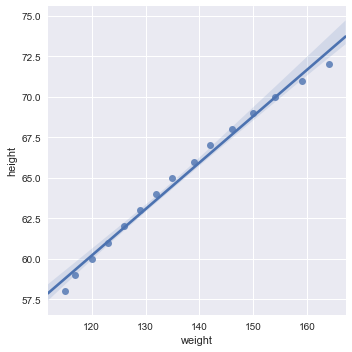

In [44]:
womenPlot = sns.lmplot('weight', 'height', data = womenDF)

In [70]:
womenOLS = sm.OLS.from_formula('height ~ weight', womenDF).fit()
print(womenOLS.summary())
print(womenOLS.ess)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.09e-14
Time:                        22:57:36   Log-Likelihood:                -7.8974
No. Observations:                  15   AIC:                             19.79
Df Residuals:                      13   BIC:                             21.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7235      1.044     24.645      0.0

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [73]:
womenOLS = sm.OLS.from_formula('height ~ weight + np.power(weight, 2)', womenDF).fit()
print(womenOLS.summary())
print(womenOLS.ess)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.732e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.12e-22
Time:                        23:00:39   Log-Likelihood:                 19.943
No. Observations:                  15   AIC:                            -33.89
Df Residuals:                      12   BIC:                            -31.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -11.7469    

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


From the two ssr and summarys above, we can see that the R-squared value raised from 0.991 to 1.000, which is good, now that means SSE is 0, every data point is on our regression line!

### Question 13

What is the difference between a *reinforcement* and *interference* interaction effect. Provide an eample of each.

reinforcement: $E\{Y\}=10+2X1+5X2+0.5X1X2$

interference: $E\{Y\}=10+2X1+5X2−0.5X1X2$

As we can see, there is a positive linear relationship between $X1$ and $X2$, which means the lines are going to be more seperate from each other on effect plot as $X$ goes larger, on the other hand, there is a negative linear relationship between $X1$ and $X2$, which means the lines are going to be closer to each other even intersect on effect plot as $X$ goes larger.

### Question 14

Import `advertising.csv`. Fit the best possible regression model using interaction and/or polynomials regressors, if appropriate. Provide an intuition as to why the significant regressors are contextually relevant.

In [14]:
adData = pd.read_csv("advertising.csv")
adData.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


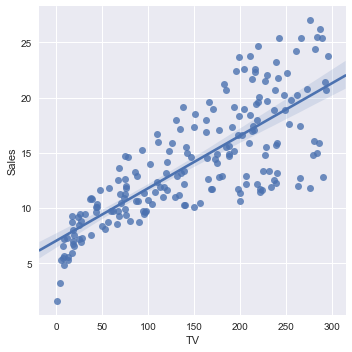

In [75]:
sns.lmplot('TV', 'Sales', data = adData)

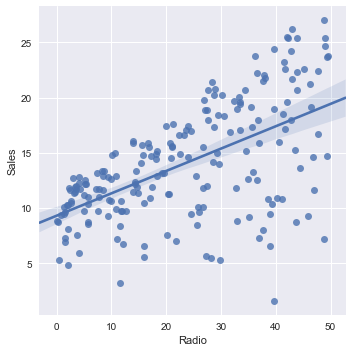

In [76]:
sns.lmplot('Radio', 'Sales', data = adData)

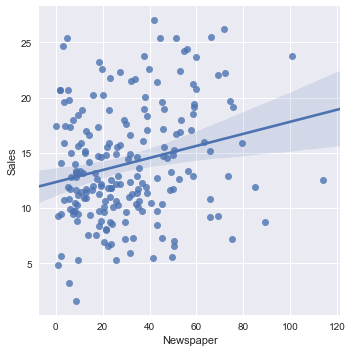

In [77]:
sns.lmplot('Newspaper', 'Sales', data = adData)

From the three plots above we can see that the Newspaper V.S. Sales is terrible, we can even draw a circle around the data, which is bad for predicting a fitted regression line.

In [80]:
adModel = sm.OLS.from_formula("Sales ~ TV + Radio + np.power(TV, 2) + np.power(Radio, 2) + TV*Radio", adData).fit()
adModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2740.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          8.17e-178
Time:                        23:26:30   Log-Likelihood:                -186.54
No. Observations:                 200   AIC:                             385.1
Df Residuals:                     194   BIC:                             404.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1944      0.206     25.202      0.000       4.788       5.601
TV                     0.0510      0.002     22.801      0.000       0.047       0.055
Radio                  0.0265      0.012      2.136      0.034       0.002       0.051
np.power(TV, 2)       -0.0001    6.9e-06    -15.914      0.000      -0.000   -9.62e-05
np.power(Radio, 2)     0.0002      0.000      0.789      0.431      -0.000       0.001
TV:Radio               0.0011   3.48e-05     30.892      0.000       0.001       0.001
==============================================================================
Omnibus:                      170.235   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4115.221
Skew:                          -2.994   Prob(JB):                         0.00
Kurtosis:                      24.400   Cond. No.                     1.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 15

Import `credit.csv`. Fit the best possible model you can to predict loan `balance`. Be explicit about your coding scheme for the dummy variables.  In your final model, provide insight  as to why the significant regressors are contextually relevant?

In [23]:
cdData = pd.read_csv("credit.csv")
cdData.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [93]:
cdDataNew = cdData.join(pd.get_dummies(cdData['student'], prefix="student"))
cdDataNew.head()

,Unnamed: 0,default,student,balance,income,student_No,student_Yes
0,1,No,No,729.526495,44361.625074,1,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,1,0
3,4,No,No,529.250605,35704.493935,1,0
4,5,No,No,785.655883,38463.495879,1,0


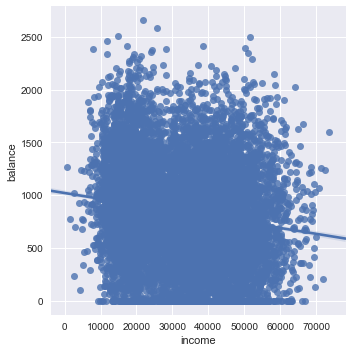

In [90]:
sns.lmplot('income', 'balance', data = cdDataNew)

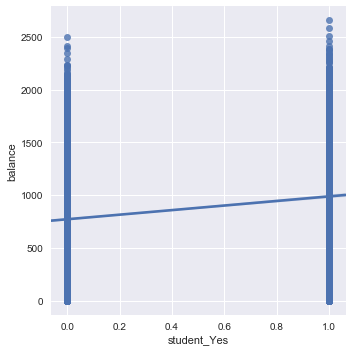

In [94]:
sns.lmplot('student_Yes', 'balance', data = cdDataNew)

In [110]:
cdDataModel = sm.OLS.from_formula('balance ~ income + student_Yes', cdDataNew).fit()
cdDataModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.28e-92
Time:                        23:59:47   Log-Likelihood:                -75792.
No. Observations:               10000   AIC:                         1.516e+05
Df Residuals:                    9997   BIC:                         1.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     767.5623     22.356     34.334      0.000     723.741     811.384
income          0.0001      0.001      0.195      0.846      -0.001       0.001
student_Yes   218.3681     15.820     13.804      0.000     187.358     249.378
==============================================================================
Omnibus:                      170.544   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.115
Skew:                           0.238   Prob(JB):                     1.13e-32
Kurtosis:                       2.644   Cond. No.                     2.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 16

Code up a backward elimination algorithm, which begins with a regression model that contains all avaiable explanatory variables in the model, and eliminates them sequentially (*one at a time*), until the $p$-values of remaining variables are all below a threshold value, in this case, &\alpha = 0.05$.

Import `mlb_01.csv`. Regress `Salary` on all other variables except `Player`. Explicitly state the coding scheme you employ for all dummy variables. Using the abovementioned algorithm, find a purely additive regression model. Discuss and interpret the merits of this model. 

Using the model identified by the backward elimination algorithm as a baseline, begin to test polynomial and interaction terms you think may be appropriate for this model. Settle on a final model which you believe is the best possible mode you can build to rpedict `Salary` using the e

By removing every variable that has a p-value higher than 0.05, we have "Japanese", "Experience", and "HR" in our model as explanatory variables.

In [97]:
mlbData = pd.read_csv("mlb_01.csv")
mlbData.head()

,Player,Salary,Experience,Japanese,Dominican,HR,League,Position.Name
0,"Tracy, Chad",5000000,4,0,0,8,National,Infielder
1,"Buscher, Brian",412500,0,0,0,4,American,Infielder
2,"Bautista, Jose A.",2400000,3,0,1,15,American,Infielder
3,"Roberts, Ryan",400000,0,0,0,0,National,Infielder
4,"Matsui, Hideki",13000000,6,1,0,9,American,Outfielder


In [122]:
mlbDataModel = sm.OLS.from_formula('Salary ~ Experience + Japanese + Dominican + HR + C(League)', mlbData).fit()
mlbDataModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     53.17
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           1.44e-34
Time:                        00:06:21   Log-Likelihood:                -3277.0
No. Observations:                 200   AIC:                             6566.
Df Residuals:                     194   BIC:                             6586.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.439e+06   4.78e+05     -3.010      0.003   -2.38e+06   -4.96e+05
C(League)[T.National]  3.618e+05    4.6e+05      0.786      0.433   -5.46e+05    1.27e+06
Experience             5.675e+05   6.11e+04      9.289      0.000    4.47e+05    6.88e+05
Japanese               9.996e+06   2.28e+06      4.380      0.000    5.49e+06    1.45e+07
Dominican              1.066e+06   7.03e+05      1.516      0.131   -3.21e+05    2.45e+06
HR                     2.132e+05   2.26e+04      9.452      0.000    1.69e+05    2.58e+05
==============================================================================
Omnibus:                       67.368   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.895
Skew:                           1.310   Prob(JB):                     8.98e-55
Kurtosis:                       7.796   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
mlbDataModel = sm.OLS.from_formula('Salary ~ Experience + Japanese + Dominican + HR', mlbData).fit()
mlbDataModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     66.43
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           2.24e-35
Time:                        00:00:07   Log-Likelihood:                -3277.3
No. Observations:                 200   AIC:                             6565.
Df Residuals:                     195   BIC:                             6581.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.214e+06   3.82e+05     -3.176      0.002   -1.97e+06    -4.6e+05
Experience  5.656e+05    6.1e+04      9.274      0.000    4.45e+05    6.86e+05
Japanese    9.963e+06   2.28e+06      4.370      0.000    5.47e+06    1.45e+07
Dominican   1.038e+06   7.01e+05      1.480      0.141   -3.46e+05    2.42e+06
HR          2.127e+05   2.25e+04      9.444      0.000    1.68e+05    2.57e+05
==============================================================================
Omnibus:                       64.648   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.508
Skew:                           1.274   Prob(JB):                     1.08e-49
Kurtosis:                       7.535   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
mlbDataModel = sm.OLS.from_formula('Salary ~ Experience + Japanese + HR', mlbData).fit()
mlbDataModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     87.32
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           6.46e-36
Time:                        00:16:38   Log-Likelihood:                -3278.4
No. Observations:                 200   AIC:                             6565.
Df Residuals:                     196   BIC:                             6578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.127e+06   3.79e+05     -2.976      0.003   -1.87e+06    -3.8e+05
Experience  5.739e+05   6.09e+04      9.421      0.000    4.54e+05    6.94e+05
Japanese    9.844e+06   2.29e+06      4.308      0.000    5.34e+06    1.44e+07
HR          2.131e+05   2.26e+04      9.434      0.000    1.69e+05    2.58e+05
==============================================================================
Omnibus:                       62.234   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.087
Skew:                           1.233   Prob(JB):                     1.46e-46
Kurtosis:                       7.388   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
mlbData.corr()

,Salary,Experience,Japanese,Dominican,HR
Salary,1.000000,0.581716,0.186972,0.124779,0.583580
Experience,0.581716,1.000000,-0.019272,0.099481,0.277450
Japanese,0.186972,-0.019272,1.000000,-0.037113,-0.012043
Dominican,0.124779,0.099481,-0.037113,1.000000,0.039489
HR,0.583580,0.277450,-0.012043,0.039489,1.000000
